In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from keras.preprocessing.sequence import pad_sequences
from pickle import dump,load

In [22]:
ap=argparse.ArgumentParser()
# ap.add_argument('-i','--image',required=True,help="Image Path")
# args=vars(ap.parse_args())
imgPath="C:/Users/chawl/OneDrive/Desktop/home.jpeg"

def extractFeatures(filename,model):
    try:
        image=Image.open(filename)
    except:
        print("ERROR:Couldn't open image")
    image=image.resize((299,299))
    image=np.array(image)
    if image.shape[2]==4:
        image=image[...,:3]
    image=np.expand_dims(image,axis=0)
    image=image/127.5
    image=image-1.0
    feature=model.predict(image)
    return feature

def wordForID(integer,tokenizer):
    for word,index in tokenizer.word_index.items():
        if index==integer:
            return word
    return None

def generateDescription(model,tokenizer,photo,maxLength):
    inText='start'
    for i in range(maxLength):
        sequence=tokenizer.texts_to_sequences([inText])[0]
        sequence=pad_sequences([sequence], maxlen=maxLength)
        pred = model.predict([photo,sequence], verbose=0)
        pred = np.argmax(pred)
        word=wordForID(pred,tokenizer)
        if word is None:
            break
        inText+=' '+word
        if word=='end':
            break
    return inText

1/1 [==============================] - 1s 887ms/step



start two people are walking along the street end


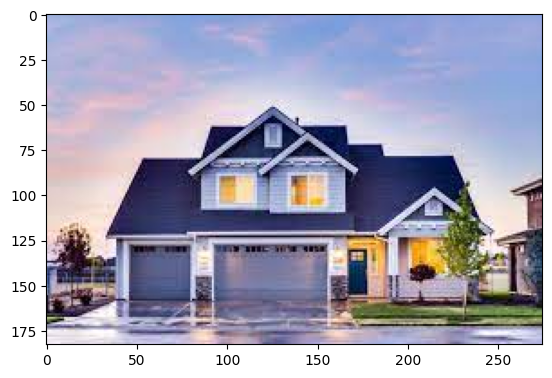

In [23]:
from keras.models import Model,load_model
from keras.applications.xception import Xception,preprocess_input

maxLength=32
tokenizer=load(open("tokenizer.p","rb"))
model=load_model('models/model9.h5')
xception=Xception(include_top=False,pooling="avg")

photo=extractFeatures(imgPath,xception)
img=Image.open("C:/Users/chawl/OneDrive/Desktop/home.jpeg")
description=generateDescription(model,tokenizer,photo,maxLength)
print("\n\n")
print(description)
plt.imshow(img)